<a href="https://colab.research.google.com/github/Steiner-bot/CHM/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import random
import itertools as it

In [16]:
# ГОРОДА ДАГЕСТАНА

In [17]:
mas_distance = [[0, "Махачкала", "Хасавюрт", "Каспийск", "Дербент", "Южно-сухокуск", "Беладжи", "Магарамкент", "Ботлих", "Леваши", "Новокаякент" ],
                ["Махачкала", 0, 86, 18, 129, 307, 155, 184, 145, 94, 86 ],
                ["Хасавюрт", 86, 0, 105, 208, 225, 234, 264, 136 , 143 , 165  ],
                ["Каспийск", 18, 105, 0, 120 , 324 , 146 , 175 , 162, 85 , 77  ],
                ["Дербент", 129, 208, 120 , 0, 429 , 26 , 55 , 268 , 123 , 53 ],
                ["Южно-сухокуск", 307, 225, 324 , 429 , 0, 455 , 485 , 361 , 364 , 386  ],
                ["Беладжи", 155, 234, 146 , 26 , 455 , 0, 34 , 294 , 149 , 79  ],
                ["Магарамкент", 184, 264, 175 , 55 , 485 , 34 , 0, 323 , 179 , 108  ],
                ["Ботлих", 145, 136 , 162, 268 , 361 , 294 , 323 , 0, 138 , 224  ],
                ["Леваши", 94, 143 , 85 , 123 , 364 , 149 , 179 , 138 , 0, 80  ],
                ["Новокаякент", 86, 165 , 77 , 53, 386 , 79 , 108 , 224 , 80 , 0 ]]
Dict_name = dict([[i-1,mas_distance[0][i]] for i in range(1,len(mas_distance[0]))])
mas_distance=list([[mas_distance[i][j] for j in range(1,len(mas_distance[0]))] for i in range(1,len(mas_distance))])

print(mas_distance[0])

[0, 86, 18, 129, 307, 155, 184, 145, 94, 86]


In [18]:
class Way():
    def __init__(self,len,clear = False):
        if not clear:
            self.len = len
            self.mas = list([i for i in range(len)])
            random.shuffle(self.mas)
            self.length_path_res()
        else:
            self.len = len
            self.mas = list([-1 for i in range(len)])
    def mutation(self,count=1,Pmut = 0.1):
        if(random.randrange(100)<Pmut):
            for i in range(count):
                one = random.randrange(len(self.mas))
                two = random.randrange(len(self.mas))
                if one>two: one, two = two, one
                self.mas[one:two] = reversed(self.mas[one:two])
            self.length_path_res()
    def length_path_res(self):
        self.length_path = mas_distance[self.mas[-1]][self.mas[0]]
        for i in range(1,len(self.mas)):
            self.length_path +=mas_distance[self.mas[i-1]][self.mas[i]]
    def __mul__(self, other):

        way_one = Way(len(self.mas),True)
        way_two = Way(len(other.mas),True)

        cut1 = random.randrange(len(way_one.mas))
        cut2 = random.randrange(len(way_one.mas))
        if  cut1>cut2:cut1,cut2=cut2,cut1
        way_one.mas[cut1:cut2] = self.mas[cut1:cut2]
        way_two.mas[cut1:cut2] = other.mas[cut1:cut2]

        input = other.mas[:cut1]+self.mas[:cut1]+other.mas[cut2:]+self.mas[cut2:]
        i=j=0
        while i < len(way_one.mas):
            if way_one.mas[i] == -1:
                if input[j] not in way_one.mas:
                    way_one.mas[i] = input[j]
                    i += 1
                    j += 1
                else:j += 1
            else:i += 1
        input = self.mas[:cut1] + other.mas[:cut1] + self.mas[cut2:] + other.mas[cut2:]
        i = j = 0
        while i < len(way_two.mas):
            if way_two.mas[i] == -1:
                if input[j] not in way_two.mas:
                    way_two.mas[i] = input[j]
                    i += 1
                    j += 1
                else:
                    j += 1
            else:
                i += 1
        way_one.mutation()
        way_two.mutation()

        way_one.length_path_res()
        way_two.length_path_res()
        if way_one.length_path > way_two.length_path:
            way_one, way_two = way_two,way_one
        return way_one,way_two

In [19]:
class Box():
    def __init__(self,max_way,length_way,ways = None):
        self.max_way = max_way
        if not ways:
            self.ways = []
            while len(self.ways)<self.max_way:
                self.ways.append(Way(length_way))
            self.ways = sorted(self.ways, key=lambda mas: mas.length_path)
        else:self.ways = ways
    def print(self):
        print("_________")
        for i in range(len(self.ways)):
            print(self.ways[i].length_path)
        print("_________")
    def Add_ways(self):
        j = i = 0
        mas_ways_append = list(self.ways[random.randrange(len(self.ways))]*self.ways[random.randrange(len(self.ways))])

        #print("_________")
        #for i in range(len(mas_ways_append)):
        #    print(mas_ways_append[i].length_path)
        #print("_________")
        if mas_ways_append[j].length_path < self.ways[i].length_path:
            self.ways.insert(0,mas_ways_append[j])
            i += 1
            j += 1
        while j < len(mas_ways_append) and i < len(self.ways):
            if mas_ways_append[j].length_path < self.ways[i].length_path:
                self.ways[i:i] = [mas_ways_append[j]]
                i += 1
                j += 1
            else:
                i += 1
    def Del_ways(self):
        while len(self.ways) > self.max_way:
            self.ways.pop()
    def AVG(self):
        sum = 0
        for i in range(len(self.ways)):
            sum += self.ways[i].length_path
        return sum//len(self.ways)




1874 0
1648 25
1490 50
1366 75
1300 100
1283 125
1281 150
1274 175
1265 200
1265 225
1265 250
1265 275
1265 300
1265 325
1265 350
1265 375
1265 400
1. mas [1, 7, 8, 9, 3, 5, 6, 2, 0, 4] Length = 1192
2. Хасавюрт , Ботлих , Леваши , Новокаякент , Дербент , Беладжи , Магарамкент , Каспийск , Махачкала , Южно-сухокуск , 3. 

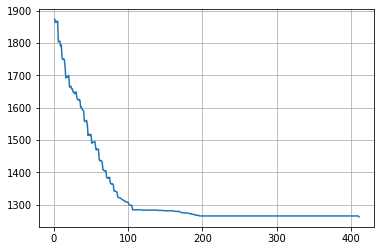

In [20]:
box = Box(30,len(Dict_name)) 
mas_graf_X= [] # массив координат
mas_graf_Y=[]
i=0
while( box.ways[0].length_path!=1192  ):
    box.Add_ways()                       # скрещиваем 
    if i%5==0:                           # после 5 скрещиваний убираем лишние гены 
        box.Del_ways()
    if i%25==0:
      print(box.AVG(),i)               
    i += 1
    mas_graf_Y.append(box.AVG())        
    mas_graf_X.append(i)
print("1. ",end="")
print("mas",box.ways[0].mas,"Length =",box.ways[0].length_path)

print("2. ",end="")
for i in range(len(box.ways[0].mas)):
    print(Dict_name[box.ways[0].mas[i]],end=" , ")

print("3. ",end="")
fig = plt.figure()
plt.plot(mas_graf_X, mas_graf_Y)
grid1 = plt.grid(True)  
plt.show()



In [21]:
min = 100000000
min_mas =[]
for i in it.permutations(range(len(Dict_name))):
  mas=list(i)
  min_vr=mas_distance[mas[-1]][mas[0]]
  for j in range(1,len(mas)):
      min_vr +=mas_distance[mas[j-1]][mas[j]]
  if min_vr<min:
        min_mas=mas
        min = min_vr

print(min,min_mas)

1192 [0, 2, 3, 5, 6, 9, 8, 7, 1, 4]
